In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import numpy as np

In [56]:
datos = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [57]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [58]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [59]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [60]:
type(datos['customer'].iloc[0])

dict

In [61]:
customer_df = pd.json_normalize(datos['customer'])
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [62]:
phone_df = pd.json_normalize(datos['phone'])
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [63]:
internet_df = pd.json_normalize(datos['internet'])
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [64]:
datos['account'].iloc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [65]:
type(datos['account'])

pandas.core.series.Series

In [66]:
account_df = pd.json_normalize(datos['account'])
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [67]:
# Expandimos cada columna que contiene un diccionario
customer_df = datos['customer'].apply(pd.Series)
phone_df = datos['phone'].apply(pd.Series)
internet_df = datos['internet'].apply(pd.Series)
account_df = datos['account'].apply(pd.Series)

In [68]:
# Combinamos todo con las columnas originales no-anidadas
datos_normalizados = pd.concat([
    datos[['customerID', 'Churn']],  # columnas no anidadas
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

In [69]:
datos_normalizados.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"


In [70]:
datos_normalizados.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges'],
      dtype='object')

In [71]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [72]:
datos_normalizados['Charges']

,Charges
0,"{'Monthly': 65.6, 'Total': '593.3'}"
1,"{'Monthly': 59.9, 'Total': '542.4'}"
2,"{'Monthly': 73.9, 'Total': '280.85'}"
3,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,"{'Monthly': 83.9, 'Total': '267.4'}"
...,...
7262,"{'Monthly': 55.15, 'Total': '742.9'}"
7263,"{'Monthly': 85.1, 'Total': '1873.7'}"
7264,"{'Monthly': 50.3, 'Total': '92.75'}"
7265,"{'Monthly': 67.85, 'Total': '4627.65'}"


In [73]:
Charges_df = datos_normalizados['Charges'].apply(pd.Series)
Charges_df.head(3)

,Monthly,Total
0,65.6,593.3
1,59.9,542.4
2,73.9,280.85


In [74]:
datosNormalizadosFinal = pd.concat([
    datos_normalizados[['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']], # columnas no anidadas
    Charges_df, #columna anidada
], axis=1)

In [75]:
datosNormalizadosFinal.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [76]:
datosNormalizadosFinal

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [77]:
print(datosNormalizadosFinal)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             

In [78]:
datosNormalizadosFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [79]:
datosNormalizadosFinal = datosNormalizadosFinal.rename(columns={
    'customerID': 'Id_Cliente',
    'Churn' : 'abandonó_del_servicio',
    'gender': 'género',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'estado_civil',
    'Dependents': 'dependientes',
    'tenure': 'meses_permanencia',
    'PhoneService': 'servicio_telefónico',
    'MultipleLines': 'líneas_telefónicas',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_línea',
    'OnlineBackup': 'copia_online',
    'DeviceProtection': 'protección_de_dispositivos',
    'TechSupport': 'soporte_técnico',
    'StreamingTV': 'TV_en_línea',
    'StreamingMovies': 'películas_en_línea',
    'Contract': 'tipo_de_contrato',
    'PaperlessBilling': 'facturación_digital',
    'PaymentMethod': 'método_de_pago',
    'Monthly': 'pagos_mensuales',
    'Total': 'pago_total' })

In [80]:
datosNormalizadosFinal.columns

Index(['Id_Cliente', 'abandonó_del_servicio', 'género', 'adulto_mayor',
       'estado_civil', 'dependientes', 'meses_permanencia',
       'servicio_telefónico', 'líneas_telefónicas', 'servicio_internet',
       'seguridad_en_línea', 'copia_online', 'protección_de_dispositivos',
       'soporte_técnico', 'TV_en_línea', 'películas_en_línea',
       'tipo_de_contrato', 'facturación_digital', 'método_de_pago',
       'pagos_mensuales', 'pago_total'],
      dtype='object')

In [81]:
print(datosNormalizadosFinal)

      Id_Cliente abandonó_del_servicio  género  adulto_mayor estado_civil  \
0     0002-ORFBO                    No  Female             0          Yes   
1     0003-MKNFE                    No    Male             0           No   
2     0004-TLHLJ                   Yes    Male             0           No   
3     0011-IGKFF                   Yes    Male             1          Yes   
4     0013-EXCHZ                   Yes  Female             1          Yes   
...          ...                   ...     ...           ...          ...   
7262  9987-LUTYD                    No  Female             0           No   
7263  9992-RRAMN                   Yes    Male             0          Yes   
7264  9992-UJOEL                    No    Male             0           No   
7265  9993-LHIEB                    No    Male             0          Yes   
7266  9995-HOTOH                    No    Male             0          Yes   

     dependientes  meses_permanencia servicio_telefónico líneas_telefónicas

In [82]:
# Verifica si hay valore único en cada columna
for col in datosNormalizadosFinal.columns:
    print(f"{col}: {datosNormalizadosFinal[col].nunique()}")

Id_Cliente: 7267
abandonó_del_servicio: 3
género: 2
adulto_mayor: 2
estado_civil: 2
dependientes: 2
meses_permanencia: 73
servicio_telefónico: 2
líneas_telefónicas: 3
servicio_internet: 3
seguridad_en_línea: 3
copia_online: 3
protección_de_dispositivos: 3
soporte_técnico: 3
TV_en_línea: 3
películas_en_línea: 3
tipo_de_contrato: 3
facturación_digital: 2
método_de_pago: 4
pagos_mensuales: 1585
pago_total: 6531


In [83]:
# verifica datos nulos
datosNormalizadosFinal.isnull().sum()

,0
Id_Cliente,0
abandonó_del_servicio,0
género,0
adulto_mayor,0
estado_civil,0
dependientes,0
meses_permanencia,0
servicio_telefónico,0
líneas_telefónicas,0
servicio_internet,0


In [84]:
for col in datosNormalizadosFinal.columns:
    print(f"{col}: {datosNormalizadosFinal[col].duplicated().sum()}")
#datosNormalizadosFinal.duplicated().sum()

Id_Cliente: 0
abandonó_del_servicio: 7264
género: 7265
adulto_mayor: 7265
estado_civil: 7265
dependientes: 7265
meses_permanencia: 7194
servicio_telefónico: 7265
líneas_telefónicas: 7264
servicio_internet: 7264
seguridad_en_línea: 7264
copia_online: 7264
protección_de_dispositivos: 7264
soporte_técnico: 7264
TV_en_línea: 7264
películas_en_línea: 7264
tipo_de_contrato: 7264
facturación_digital: 7265
método_de_pago: 7263
pagos_mensuales: 5682
pago_total: 736


In [132]:
for col in [ 'Id_Cliente',
    'abandonó_del_servicio',
    'género',
    'adulto_mayor',
    'estado_civil',
    'dependientes',
    'meses_permanencia',
    'servicio_telefónico',
    'líneas_telefónicas',
    'servicio_internet',
    'seguridad_en_línea',
    'copia_online',
    'protección_de_dispositivos',
    'soporte_técnico',
    'TV_en_línea',
    'películas_en_línea',
    'tipo_de_contrato',
    'facturación_digital',
    'método_de_pago',
    'pagos_mensuales',
    'pago_total']:
    print(f"Valores de la columna '{col}':")
    print(datosNormalizadosFinal[col].unique())
    print("-" * 20)

Valores de la columna 'Id_Cliente':
['0002ORFBO' '0003MKNFE' '0004TLHLJ' ... '9992UJOEL' '9993LHIEB'
 '9995HOTOH']
--------------------
Valores de la columna 'abandonó_del_servicio':
[0 1]
--------------------
Valores de la columna 'género':
[0 1]
--------------------
Valores de la columna 'adulto_mayor':
[0 1]
--------------------
Valores de la columna 'estado_civil':
[1 0]
--------------------
Valores de la columna 'dependientes':
[1 0]
--------------------
Valores de la columna 'meses_permanencia':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores de la columna 'servicio_telefónico':
[1 0]
--------------------
Valores de la columna 'líneas_telefónicas':
[0 1]
--------------------
Valores de la columna 'servicio_internet':
[1 0]
--------------------
Valores de la columna 'seguridad_en

In [86]:
datosNormalizadosFinal['Id_Cliente'] = datosNormalizadosFinal['Id_Cliente'].str.strip()
datosNormalizadosFinal['Id_Cliente'] = datosNormalizadosFinal['Id_Cliente'].str.replace(r'\s', '', regex=True)

#datosNormalizadosFinal['Id_Cliente'] = datosNormalizadosFinal['Id_Cliente'].str.replace(r'\-', '', regex=False).str.strip()

In [87]:
# Convierte TODO a string y limpia
datosNormalizadosFinal['Id_Cliente'] = datosNormalizadosFinal['Id_Cliente'].astype(str).str.replace(r'[^a-zA-Z0-9]', '', regex=True)

In [88]:
print(datosNormalizadosFinal['Id_Cliente'].dtype)

object


In [89]:
datosNormalizadosFinal['Id_Cliente'].sample(7)

,Id_Cliente
4371,5995LFTLE
1434,2061VVFST
5277,7206PQBBZ
507,0722TROQR
1565,2234EOFPT
1838,2615YVMYX
7211,9920GNDMB


In [90]:
datosNormalizadosFinal['tipo_de_contrato'] = datosNormalizadosFinal['tipo_de_contrato'].str.lower()
#datosNormalizadosFinal['tipo_de_contrato'] = datosNormalizadosFinal['tipo_de_contrato'].str.replace(r'\s', '', regex=True)
datosNormalizadosFinal['tipo_de_contrato'] = datosNormalizadosFinal['tipo_de_contrato'].str.replace(r'\-', ' ', regex=True).str.strip()

In [91]:
datosNormalizadosFinal['tipo_de_contrato'].sample(7)

,tipo_de_contrato
5454,one year
7032,month to month
2513,month to month
6793,month to month
1598,month to month
4730,one year
5357,two year


In [92]:
datosNormalizadosFinal['método_de_pago'] = datosNormalizadosFinal['método_de_pago'].str.lower()
datosNormalizadosFinal['método_de_pago'] = datosNormalizadosFinal['método_de_pago'].str.replace(r'\(.*\)', '', regex=True).str.strip()
datosNormalizadosFinal['método_de_pago'] = datosNormalizadosFinal['método_de_pago'].astype(str)
#datosNormalizadosFinal['método_de_pago'] = datosNormalizadosFinal['método_de_pago'].str.replace(r'\s', '', regex=True).str.strip()

In [93]:
datosNormalizadosFinal['método_de_pago'].sample(7)

,método_de_pago
2138,mailed check
2343,bank transfer
2517,bank transfer
6060,electronic check
6715,electronic check
7022,mailed check
277,bank transfer


In [94]:
datosNormalizadosFinal['método_de_pago'] = datosNormalizadosFinal['método_de_pago'].replace(' ', np.nan)
datosNormalizadosFinal['pago_total'] = pd.to_numeric( datosNormalizadosFinal['pago_total'], errors='coerce').fillna(0)
datosNormalizadosFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id_Cliente                  7267 non-null   object 
 1   abandonó_del_servicio       7267 non-null   object 
 2   género                      7267 non-null   object 
 3   adulto_mayor                7267 non-null   int64  
 4   estado_civil                7267 non-null   object 
 5   dependientes                7267 non-null   object 
 6   meses_permanencia           7267 non-null   int64  
 7   servicio_telefónico         7267 non-null   object 
 8   líneas_telefónicas          7267 non-null   object 
 9   servicio_internet           7267 non-null   object 
 10  seguridad_en_línea          7267 non-null   object 
 11  copia_online                7267 non-null   object 
 12  protección_de_dispositivos  7267 non-null   object 
 13  soporte_técnico             7267 

In [95]:
datosNormalizadosFinal['género'].sample(7)

,género
5240,Male
3613,Male
4358,Male
6401,Female
5953,Female
4759,Female
2002,Male


In [96]:
# (Male/Female/'') → 1/0/0
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['género']] = datosNormalizadosFinal.loc[:, ['género']].replace({'Male': 1, 'Female': 0, '': np.nan})
datosNormalizadosFinal.loc[:,['género']] = datosNormalizadosFinal.loc[:,['género']].fillna(0)
datosNormalizadosFinal[['género']] = datosNormalizadosFinal[['género']].astype(np.int64)

In [97]:
# (Yes/No/'') → 1/0/0
pd.set_option('future.no_silent_downcasting', True)
categoricos2binarios = ['abandonó_del_servicio','estado_civil', 'dependientes', 'servicio_telefónico',  'facturación_digital']
datosNormalizadosFinal.loc[:,categoricos2binarios] = datosNormalizadosFinal.loc[:,categoricos2binarios].replace({'Yes': 1, 'No': 0, '': np.nan})
datosNormalizadosFinal.loc[:,categoricos2binarios] = datosNormalizadosFinal.loc[:,categoricos2binarios].fillna(0)
datosNormalizadosFinal[categoricos2binarios] = datosNormalizadosFinal[categoricos2binarios].astype(np.int64)

In [141]:
pd.set_option('future.no_silent_downcasting', True)
categoricos2binarios = ['copia_online','estado_civil', 'protección_de_dispositivos', 'soporte_técnico',  'TV_en_línea', 'películas_en_línea', 'seguridad_en_línea']
datosNormalizadosFinal.loc[:,categoricos2binarios] = datosNormalizadosFinal.loc[:,categoricos2binarios].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
datosNormalizadosFinal.loc[:,categoricos2binarios] = datosNormalizadosFinal.loc[:,categoricos2binarios].fillna(0)
datosNormalizadosFinal[categoricos2binarios] = datosNormalizadosFinal[categoricos2binarios].astype(np.int64)

In [109]:
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['líneas_telefónicas']] = datosNormalizadosFinal.loc[:, ['líneas_telefónicas']].replace({'Yes': 1, 'No': 0, 'No phone service': 0})
datosNormalizadosFinal.loc[:,['líneas_telefónicas']] = datosNormalizadosFinal.loc[:,['líneas_telefónicas']].fillna(0)
datosNormalizadosFinal[['líneas_telefónicas']] = datosNormalizadosFinal[['líneas_telefónicas']].astype(np.int64)

In [118]:
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['servicio_internet']] = datosNormalizadosFinal.loc[:, ['servicio_internet']].replace({'DSL': 1, 'Fiber optic': 2, 'No': 0})
datosNormalizadosFinal.loc[:,['servicio_internet']] = datosNormalizadosFinal.loc[:,['servicio_internet']].fillna(0)
datosNormalizadosFinal[['servicio_internet']] = datosNormalizadosFinal[['servicio_internet']].astype(np.int64)

In [133]:
for col in [ 'Id_Cliente',
    'abandonó_del_servicio',
    'género',
    'adulto_mayor',
    'estado_civil',
    'dependientes',
    'meses_permanencia',
    'servicio_telefónico',
    'líneas_telefónicas',
    'servicio_internet',
    'seguridad_en_línea',
    'copia_online',
    'protección_de_dispositivos',
    'soporte_técnico',
    'TV_en_línea',
    'películas_en_línea',
    'tipo_de_contrato',
    'facturación_digital',
    'método_de_pago',
    'pagos_mensuales',
    'pago_total']:
    print(f"Valores de la columna '{col}':")
    print(datosNormalizadosFinal[col].unique())
    print("-" * 20)

Valores de la columna 'Id_Cliente':
['0002ORFBO' '0003MKNFE' '0004TLHLJ' ... '9992UJOEL' '9993LHIEB'
 '9995HOTOH']
--------------------
Valores de la columna 'abandonó_del_servicio':
[0 1]
--------------------
Valores de la columna 'género':
[0 1]
--------------------
Valores de la columna 'adulto_mayor':
[0 1]
--------------------
Valores de la columna 'estado_civil':
[1 0]
--------------------
Valores de la columna 'dependientes':
[1 0]
--------------------
Valores de la columna 'meses_permanencia':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------
Valores de la columna 'servicio_telefónico':
[1 0]
--------------------
Valores de la columna 'líneas_telefónicas':
[0 1]
--------------------
Valores de la columna 'servicio_internet':
[1 0]
--------------------
Valores de la columna 'seguridad_en

In [136]:
pd.set_option('future.no_silent_downcasting', True)
datosNormalizadosFinal.loc[:, ['método_de_pago']] = datosNormalizadosFinal.loc[:, ['método_de_pago']].replace({'electronic check': 1, 'credit card': 2, 'mailed check': 3, 'bank transfer': 0})
datosNormalizadosFinal.loc[:,['método_de_pago']] = datosNormalizadosFinal.loc[:,['método_de_pago']].fillna(0)
datosNormalizadosFinal[['método_de_pago']] = datosNormalizadosFinal[['método_de_pago']].astype(np.int64)

In [143]:
datosNormalizadosFinal.sample(7)

,Id_Cliente,abandonó_del_servicio,género,adulto_mayor,estado_civil,dependientes,meses_permanencia,servicio_telefónico,líneas_telefónicas,servicio_internet,...,copia_online,protección_de_dispositivos,soporte_técnico,TV_en_línea,películas_en_línea,tipo_de_contrato,facturación_digital,método_de_pago,pagos_mensuales,pago_total
7182,9874QLCLH,1,0,0,1,1,17,1,1,1,...,0,1,0,1,1,0,1,1,104.20,1743.50
4630,6345HOVES,0,1,0,0,0,34,0,0,1,...,0,0,0,0,0,0,1,0,25.05,852.70
4039,5527ACHSO,0,0,0,0,0,11,1,0,1,...,0,0,1,1,1,0,0,3,70.50,829.30
6148,8409WQJUX,0,0,0,0,0,25,0,0,1,...,0,1,1,1,1,0,0,1,54.20,1423.15
2065,2907ILJBN,0,0,0,1,1,11,1,0,0,...,0,0,0,0,0,0,0,3,20.60,233.90
4360,5982FPVQN,0,0,0,1,1,37,1,1,1,...,1,1,0,0,1,0,1,1,95.15,3532.85
2206,3084DOWLE,0,0,0,1,0,72,1,1,1,...,1,1,1,1,1,0,0,0,92.00,6474.40


In [144]:
datosNormalizadosFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id_Cliente                  7267 non-null   object 
 1   abandonó_del_servicio       7267 non-null   int64  
 2   género                      7267 non-null   int64  
 3   adulto_mayor                7267 non-null   int64  
 4   estado_civil                7267 non-null   int64  
 5   dependientes                7267 non-null   int64  
 6   meses_permanencia           7267 non-null   int64  
 7   servicio_telefónico         7267 non-null   int64  
 8   líneas_telefónicas          7267 non-null   int64  
 9   servicio_internet           7267 non-null   int64  
 10  seguridad_en_línea          7267 non-null   int64  
 11  copia_online                7267 non-null   int64  
 12  protección_de_dispositivos  7267 non-null   int64  
 13  soporte_técnico             7267 

<ipython-input-150-1895604449>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='abandonó_del_servicio', data=datosNormalizadosFinal, ci=None)
<ipython-input-150-1895604449>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='abandonó_del_servicio', data=datosNormalizadosFinal, ci=None)
<ipython-input-150-1895604449>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='abandonó_del_servicio', data=datosNormalizadosFinal, ci=None)
<ipython-input-150-1895604449>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='abandonó_del_servicio', data=datosNormalizadosFinal, ci=None)
<ipython-input-150-1895604449>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=

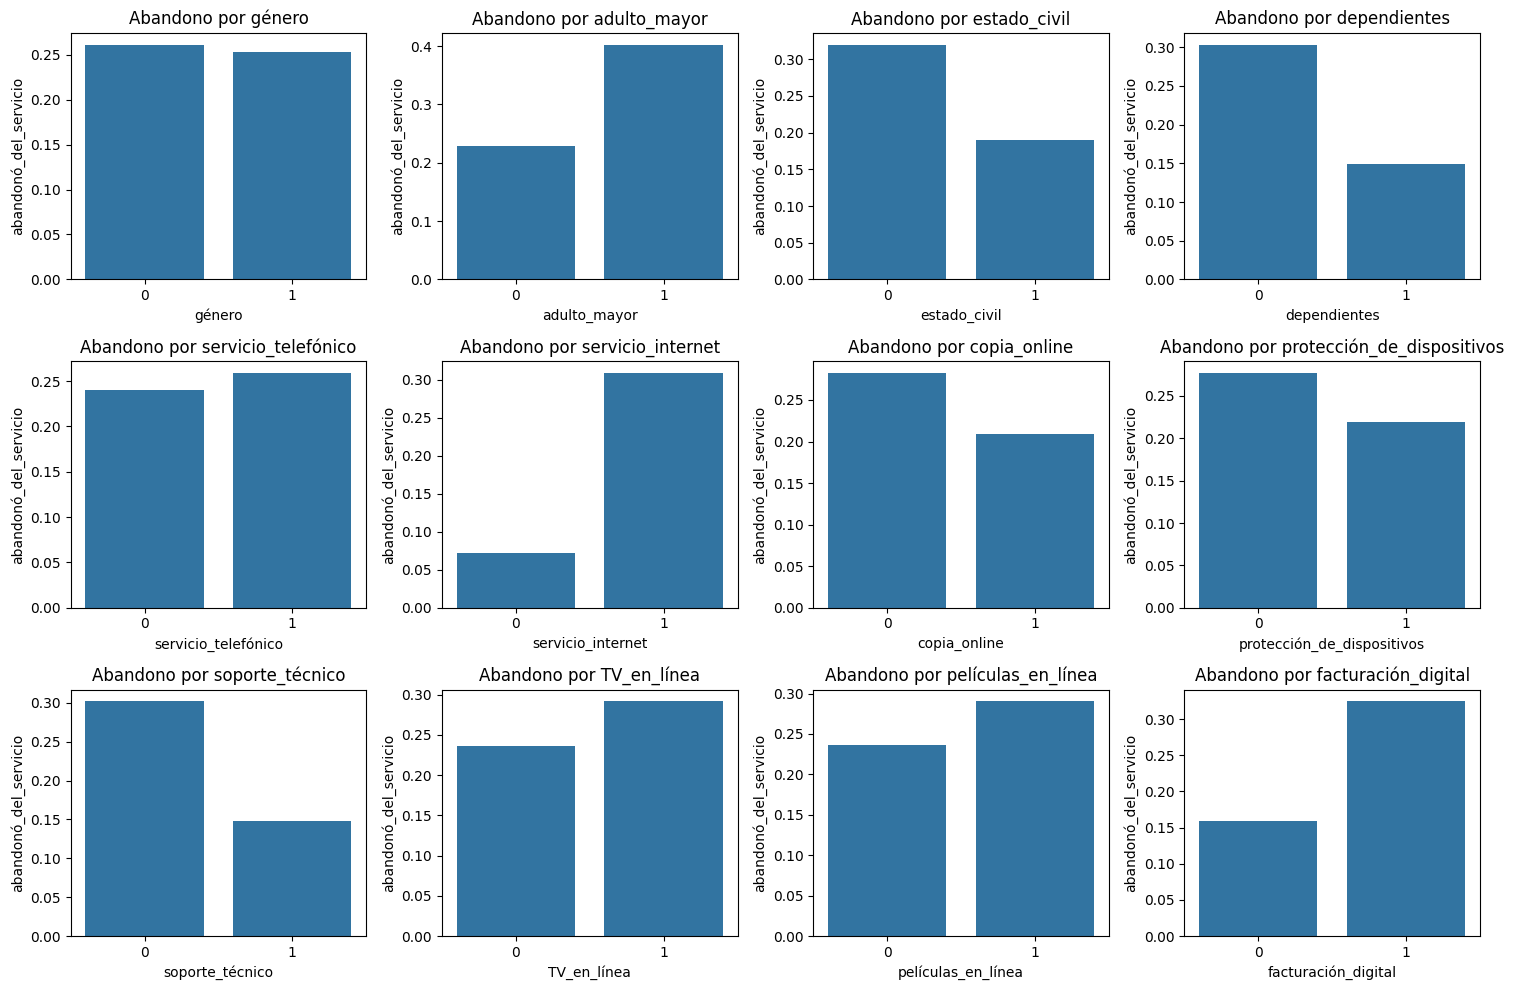

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables binarias a analizar
binary_vars = ['género', 'adulto_mayor', 'estado_civil', 'dependientes',
               'servicio_telefónico', 'servicio_internet', 'copia_online',
               'protección_de_dispositivos', 'soporte_técnico', 'TV_en_línea',
               'películas_en_línea', 'facturación_digital']

plt.figure(figsize=(15, 10))
for i, var in enumerate(binary_vars, 1):
    plt.subplot(3, 4, i)
    sns.barplot(x=var, y='abandonó_del_servicio', data=datosNormalizadosFinal, ci=None)
    plt.title(f'Abandono por {var}')
plt.tight_layout()
plt.show()



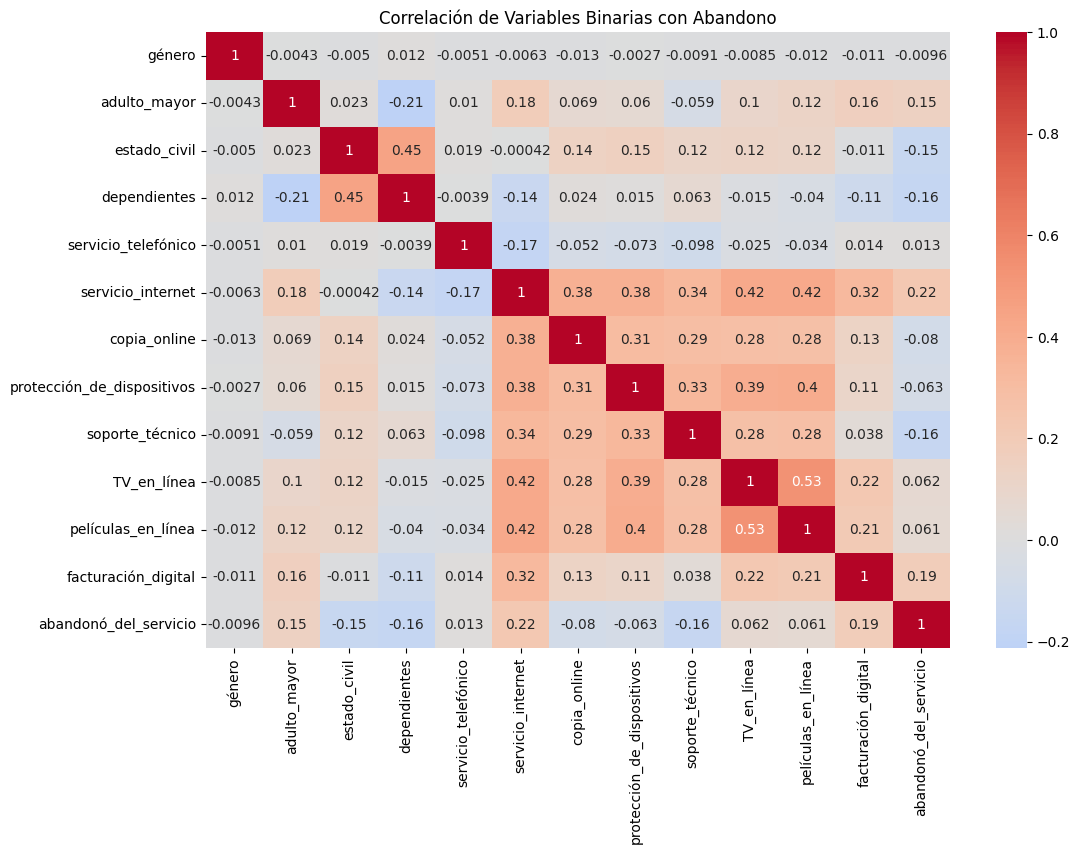

In [149]:
plt.figure(figsize=(12, 8))
corr = datosNormalizadosFinal[binary_vars + ['abandonó_del_servicio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de Variables Binarias con Abandono')
plt.show()

datosNormalizadosFinal.info()